In [1]:
import json
import codecs
import re
import spacy
import glob
from time import perf_counter

nlp_sm = spacy.load("fr_core_news_sm")
nlp_md = spacy.load("fr_core_news_md")
nlp_lg = spacy.load("fr_core_news_lg")

def ouvrir_json(path):
    f = codecs.open(path, encoding="utf-8")
    toto = json.load(f)
    f.close()
    return toto

def decouper_mots(texte):
    mots = re.findall("[a-zA-ZÀ-ÿ][a-zA-ZÀ-ÿ-]*", texte)
    return mots

def ecrire_fichier(chemin, contenu):
    w = open(chemin, "w", encoding="utf-8")
    w.write(contenu)
    w.close()

def lire_fichier(chemin):
    f = open(chemin, "r", encoding="utf-8")
    chaine = f.read()
    f.close()
    return chaine

def ecrire_json(chemin, contenu):
    w = open(chemin, "w", encoding="utf-8")
    w.write(json.dumps(contenu, indent=2, ensure_ascii=False))
    w.close()

In [3]:
liste_fichier = glob.glob("/Users/mustapha/Documents/GitHub/28002878/Lyrics_all/*")
print("On traite %i fichiers"%len(liste_fichier))

On traite 1249 fichiers


In [34]:
infos       = []
lieux_sm    = []
lieux_md    = []
lieux_lg    = []
lieux_union = []
start =time.perf_counter()
for path in liste_fichier:
    d = dict(ouvrir_json(path))
    chansons = d.get("songs")
    artiste = d.get("name")

    for l in chansons:
        paroles = l.get("lyrics")
        if paroles != None:
            date = l.get("release_date")
            titre = l.get("title")
            clean_paroles = re.sub("\n", ". ", paroles) 
            doc1 = nlp_sm(clean_paroles)
            for entity in doc1.ents:
                if entity.label_ =="LOC":
                    lieux = entity.text
                    lieux_sm.append(lieux)
            
            doc2 = nlp_md(clean_paroles)
            for entity in doc2.ents:
                if entity.label_ =="LOC":
                    lieux = entity.text
                    lieux_md.append(lieux)
                    
            doc3 = nlp_lg(clean_paroles)
            for entity in doc3.ents:
                if entity.label_ =="LOC":
                    lieux = entity.text
                    lieux_lg.append(lieux)
            
            lieux_union = (lieux_sm+lieux_md+lieux_lg)
            
            infos.append([{"artiste" :artiste , "titre de la chanson" : titre, "date" : date,"lyrics" : clean_paroles, "lieux" : [l for l in set(lieux_union) if l in clean_paroles]}])

            
        ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/infos&stats/infos_all_data.json",infos)
end = time.perf_counter()
print("temps :",end-start)    

temps : 19117.375993281


In [3]:
def trouver_lieux(artiste):
    lieux = ouvrir_json("/Users/mustapha/Documents/GitHub/Memoire/infos&stats/infos_all_data.json")
    list_lieux = []
    for i in lieux:
        for k in i:
            if k["artiste"] == artiste:
                list_lieux.append(k["lieux"])
    return sum(list_lieux,[])

In [4]:
len(trouver_lieux("Booba"))

5484

In [2]:
IDF_json = glob.glob("/Users/mustapha/Documents/GitHub/Memoire/Data/lieux_paris/*.json")
print(len(IDF_json))
list_lieux_IDF = []
for fichier in IDF_json:
    lp = ouvrir_json(fichier)
    for lieu in lp:
        list_lieux_IDF.append(lieu)
print(list_lieux_IDF)

31
["Pointe de l'Arsenal", 'Pointe Saint-Eustache', 'Pointe Trigano', 'Porte Brancion', 'Porte Brunet', 'Porte Chaumont', 'Porte Dauphine', 'Porte Didot', 'Porte Dorée', 'porte de Picpus', 'Porte Jaune', 'Porte Maillot', 'Porte Pouchet', 'Porte Saint-James', "Porte d'Arcueil", "Porte d'Asnières", "Porte d'Aubervilliers", "Porte d'Auteuil", "Porte d'Issy", "Porte d'Italie", "Porte d'Ivry", "Porte d'Orléans", 'Porte de Bagatelle', 'Porte de Bagnolet', 'Porte de Bercy', 'Porte de Boulogne', 'Porte de Champerret', 'Porte de Charenton', 'Porte de Choisy', 'Porte de Châtillon', 'Porte de Clichy', 'Porte de Clignancourt', 'Porte de Courcelles', 'Porte de Gentilly', 'Porte de Madrid', 'Porte de Montempoivre', 'Porte de Montmartre', 'Porte de Montreuil', 'Porte de Montrouge', 'Porte de Ménilmontant', 'Porte de Neuilly', 'Porte de Pantin', 'Porte de Passy', 'Porte de Plaisance', 'Porte de Reuilly', 'Porte de Saint-Cloud', 'Porte de Saint-Mandé', 'Porte de Saint-Ouen', 'Porte de Sèvres', 'Porte d

In [45]:
def lieux_Paris(artiste, list_lieux_IDF):
    lieux_Paris = []
    for lieu in trouver_lieux(artiste):
        for lp in list_lieux_IDF:
            if lp.lower() == lieu.lower():
                lieux_Paris.append(lp)
    return lieux_Paris

In [56]:
print(set(lieux_Paris("Georges Brassens",list_lieux_IDF)))

{'Thiais', 'Montparnasse', 'Porte des Lilas', 'Pont Neuf', 'rue du Vieux Colombier', 'pont Mirabeau', 'pont Neuf', 'Passy', 'Hôpital Saint-Louis', 'Tuileries', 'pont des Arts', 'Quartier Latin', 'boulevard de Sébastopol', 'Charonne', 'Pontoise', 'Pantin', 'Baby', 'rue Blondel', 'Versailles', 'Clamart', 'Gare', 'Auteuil', 'Élysée', 'Louvre', 'Panthéon', 'Paris', 'Notre-Dame', 'Sorbonne', 'Roule', 'Vanves', 'Meudon', 'Seine', 'Europe', 'Bercy', 'hôpital Saint-Louis', 'Opéra', 'rue Descartes', 'Bagneux'}


Fréquence d’apparition d’un lieu dans le corpus
-----------------

In [41]:
def occurrence_lieu(lieu):
    lieux_corpus = ouvrir_json("/Users/mustapha/Documents/GitHub/Memoire/infos&stats/infos_all_data.json")
    list_lieux = []
    freq = {}
    for i in lieux_corpus:
        for e in i:
            list_lieux.append(e["lieux"])
    lieux = sum(list_lieux,[])

    for e in lieux:
        if e.lower() == lieu:
            freq.setdefault(e, 0)
            freq[e]+=1
    return freq

In [42]:
print(occurrence_lieu("paris"),occurrence_lieu("porte de la chapelle"),occurrence_lieu("rue des ecoles"))

{'Paris': 832, 'PARIS': 4} {'Porte de la Chapelle': 1} {'rue des Ecoles': 1}


In [4]:
def fonction_bonus(lieu):
    infos = ouvrir_json("/Users/mustapha/Documents/GitHub/Memoire/infos&stats/infos_all_data.json")
    informations = []
    for chanson in infos:
        for e in chanson[0]["lieux"]:
            if e!=lieu and e.lower()!=lieu:
                continue
            if e.lower() in list_lieux_IDF or e in list_lieux_IDF:
                informations.append([chanson[0]["artiste"],chanson[0]["titre de la chanson"],chanson[0]["date"]])
    return informations

In [8]:
fonction_bonus("sevran")

[['Alkpote', 'Mega Medley', '2017-09-20'],
 ['Alkpote', 'Mongoldorak (Remix)', '2014-04-07'],
 ['Guizmo', 'Freestyle Booska’Guizmo', '2018-02-08'],
 ['IAM', 'Donne-moi le micro', '1998-01-01'],
 ['D’ de Kabal', 'Génération Plus Rien A Perdre', None],
 ['Kaaris', '63', '2013-10-21'],
 ['Kaaris', 'Binks', '2013-03-03'],
 ['Kaaris', 'Crystal', '2015-03-04'],
 ['Kaaris', 'Il a accouché de sa propre fin', '2014-03-03'],
 ['Kaaris', 'MBM', '2013-10-21'],
 ['Kaaris', '2 et demi', '2013-10-21'],
 ['Kaaris', '4Matic', '2016-11-11'],
 ['Kaaris', 'BoosKaaris #2', '2013-10-11'],
 ['Kaaris', 'Les mains dans le dos', '2014-07-14'],
 ['Kaaris', 'Vie sauvage', '2015-03-30'],
 ['Kaaris', 'Le légiste', '2011-04-15'],
 ['Kaaris', 'Freestyle 2.7.0', '2020-08-14'],
 ['Kaaris', 'Intro : Ram Muay', '2012-05-28'],
 ['Kaaris', 'RPG', '2017-11-03'],
 ['Kaaris', 'Super Nova', '2012-05-28'],
 ['Kaaris', 'Cayman', '2012-05-28'],
 ['Kaaris', 'E. Honda', '2015-04-03'],
 ['Kaaris', 'Mafia Music - Remix', '2008-07-01'

In [42]:
fonction_bonus("baby")

[['Aya Nakamura', 'Sentiments grandissants', '2020-11-13'],
 ['Aya Nakamura', 'Je n’ai pas besoin de toi', '2017-08-25'],
 ['Aya Nakamura', 'Ça blesse', '2020-11-13'],
 ['Yael Naim', 'Toxic', '2007-10-22'],
 ['Louis delort', 'Video games', None],
 ['Daft Punk', 'Aerodynamic (Slum Village Remix)', '2003-12-01'],
 ['Michel Polnareff', 'Besoin de toi', None],
 ['Bernard Lavilliers', 'Seigneur de guerre', None],
 ['MC Solaar', 'Le sens de la vie', '1997-07-07'],
 ['Sylvie Vartan', 'Baby c’est vous', None],
 ['Sylvie Vartan', 'Baby Capone', None],
 ['Sylvie Vartan', 'Drive my car', None],
 ['Alkpote', '91-93 (Version 2013)', '2013-06-03'],
 ['Alkpote', 'Mega Medley', '2017-09-20'],
 ['Alkpote', 'On crève à petit feu', '2008-05-12'],
 ['Guizmo', 'Papyrus', '2014-12-15'],
 ['Guizmo', 'One by One (Street Remix)', None],
 ['Guizmo', 'Baby', '2016-06-03'],
 ['Java', 'Watcha Say (The Factory Team Remix)', None],
 ['Black Bomb A', 'One Sound Bite To React', '2006-10-23'],
 ['Jennifer Lanvin', 'Do 

In [34]:
fonction_bonus("rue des ecoles")

[]

In [35]:
fonction_bonus("panthéon")

[['Alkpote', 'Rien ne change', '2014-04-07'],
 ['Jacques Bertin', 'Le bonheur des autres', None],
 ['Michel Sardou', 'Si j’avais un frère', None],
 ['Maxime Le Forestier', 'Le Vieux Léon', None],
 ['Booba', '4G', '2015-12-04'],
 ['Renaud', 'Le vieux Léon', None],
 ['Jean Ferrat', 'Robert le Diable', None],
 ['Jean Ferrat', 'Les feux de Paris', None],
 ['Jean Ferrat', 'Pauvre Boris', None],
 ['Georges Brassens', 'Supplique pour être enterré à la plage de Sète', None],
 ['Georges Brassens', 'À Mireille dite “Petit Verglas”', None]]

In [16]:
m1 = ouvrir_json("/Users/mustapha/Documents/GitHub/Memoire/infos&stats/infos_all_data.json")
l1 = []
for i in m1:
    for k in i:
         for e in k["lieux"]:
            l1.append(e)

In [31]:
print("le nombre de lieux détectés par les trois modèles de spaCy: ",len(l1))

le nombre de lieux détectés par les trois modèles de spaCy:  489251


In [43]:
res = []
for lieu in list_lieux_IDF[:9068]:
    occ = fonction_bonus(lieu)
    if len(occ)>0:
        print(lieu, len(occ), "occurences")
    res.append([lieu, occ])
ecrire_json("lieux_trouves.json", res)

Porte Dauphine 2 occurences
Porte Maillot 2 occurences
Porte d'Italie 1 occurences
Porte d'Orléans 5 occurences
Porte de Champerret 1 occurences
Porte de Clichy 1 occurences
Porte de Clignancourt 1 occurences
Porte de Pantin 1 occurences
Porte de Vanves 1 occurences
Porte de la Chapelle 1 occurences
Porte de la Villette 1 occurences
Porte des Lilas 1 occurences
Porte des Lilas 1 occurences
Panthéon 11 occurences
Tour Eiffel 29 occurences
rue des Acacias 1 occurences
pont de l'Alma 5 occurences
pont d'Arcole 1 occurences
pont des Arts 5 occurences
rue d'Athènes 1 occurences
rue du Bac 1 occurences
rue des Batignolles 1 occurences
boulevard des Batignolles 1 occurences
pont de Bercy 2 occurences
rue Bergère 1 occurences
rue de Berne 1 occurences
rue Berthe 1 occurences
boulevard Bessières 1 occurences
rue Blanche 2 occurences
place Blanche 2 occurences
cité Blanche 1 occurences
rue Blondel 2 occurences
rue Buffault 1 occurences
boulevard des Capucines 1 occurences
rue Caroline 1 occurenc

Rungis 4 occurences
Pont Neuf 2 occurences
canal de l'Ourcq 2 occurences
place Blanche 2 occurences


In [40]:
len(list_lieux_IDF)

9068

In [64]:
lieu_brassens = ['Thiais', 'Montparnasse', 'Porte des Lilas', 'Pont Neuf', 'rue du Vieux Colombier',
'pont Mirabeau', 'pont Neuf', 'Passy', 'Hôpital Saint-Louis', 'Tuileries', 'pont des Arts',
'Quartier Latin', 'boulevard de Sébastopol', 'Charonne', 'Pontoise', 'Pantin', 'Baby',
'rue Blondel', 'Versailles', 'Clamart', 'Gare', 'Auteuil', 'Élysée', 'Louvre', 'Panthéon',
'Paris', 'Notre-Dame', 'Sorbonne', 'Roule', 'Vanves', 'Meudon', 'Seine', 'Europe',
'Bercy', 'hôpital Saint-Louis', 'Opéra', 'rue Descartes', 'Bagneux']

for fichier in IDF_json:
    lp = ouvrir_json(fichier)
    for lieu in lp:
        if lieu in lieu_brassens:
            print(lieu, fichier)
        
        

Porte des Lilas /Users/mustapha/Documents/GitHub/Memoire/Data/lieux_paris/Portes_de_Paris.json
Porte des Lilas /Users/mustapha/Documents/GitHub/Memoire/Data/lieux_paris/Portes_de_Paris.json
rue du Vieux Colombier /Users/mustapha/Documents/GitHub/Memoire/Data/lieux_paris/Liste_des_édifices_religieux_de_Paris.json
Panthéon /Users/mustapha/Documents/GitHub/Memoire/Data/lieux_paris/Liste_des_édifices_religieux_de_Paris.json
rue du Vieux Colombier /Users/mustapha/Documents/GitHub/Memoire/Data/lieux_paris/Liste_des_édifices_religieux_de_Paris.json
Hôpital Saint-Louis /Users/mustapha/Documents/GitHub/Memoire/Data/lieux_paris/Liste_des_édifices_religieux_de_Paris.json
pont des Arts /Users/mustapha/Documents/GitHub/Memoire/Data/lieux_paris/Rue_paris.json
rue Blondel /Users/mustapha/Documents/GitHub/Memoire/Data/lieux_paris/Rue_paris.json
rue Descartes /Users/mustapha/Documents/GitHub/Memoire/Data/lieux_paris/Rue_paris.json
pont Mirabeau /Users/mustapha/Documents/GitHub/Memoire/Data/lieux_pa

In [33]:
lieux_corpus = ouvrir_json("/Users/mustapha/Documents/GitHub/Memoire/infos&stats/infos_all_data.json")
freq = {}
for i in lieux_corpus:
    for e in i:
        list_lieux.append(e["lieux"])
lieux = sum(list_lieux,[])

for e in lieux:
    if e in list_lieux_IDF:
    #if e.lower() == lieu:
        freq.setdefault(e, 0)
        freq[e]+=1

In [8]:
sortedDict = sorted(freq.items(), key=lambda x: x[1], reverse=True

[('Paris', 832), ('Baby', 265), ('Seine', 185), ('Amérique', 116), ('Roule', 83), ('Sevran', 74), ('Europe', 62), ('Gare', 62), ('Élysée', 35), ('Trappes', 35), ('Bercy', 33), ('Opéra', 30), ('Tour Eiffel', 29), ('Nanterre', 29), ('Fresnes', 26), ('Clichy', 24), ('Notre-Dame', 23), ('Evry', 23), ('Grigny', 21), ('Pantin', 20), ('Belleville', 18), ('Montmartre', 18), ('Orly', 18), ('Montparnasse', 17), ('Melun', 16), ('Villette', 15), ('Valenton', 15), ('Halles', 14), ('Cité', 14), ('Pologne', 14), ('Courcouronnes', 14), ('Versailles', 13), ('Vincennes', 13), ('Sarcelles', 12), ('Osny', 12), ('Chapelle', 12), ('Seine-Saint-Denis', 11), ('Panthéon', 11), ('Sorbonne', 11), ('Passy', 10), ('Louvre', 10), ('Auteuil', 9), ('Bondy', 9), ('Tuileries', 9), ('Batignolles', 9), ('Temple', 8), ('Madeleine', 8), ('Monnaie', 7), ('Grenelle', 7), ('Père Lachaise', 7), ('Charonne', 7), ('Clignancourt', 6), ('Invalides', 6), ('pont Mirabeau', 6), ('Javel', 6), ('Massy', 6), ('Ménilmontant', 6), ('Meudo

In [27]:
top20 = sortedDict[0:20]

In [28]:
print(top20)

[('Paris', 832), ('Baby', 265), ('Seine', 185), ('Amérique', 116), ('Roule', 83), ('Sevran', 74), ('Europe', 62), ('Gare', 62), ('Élysée', 35), ('Trappes', 35), ('Bercy', 33), ('Opéra', 30), ('Tour Eiffel', 29), ('Nanterre', 29), ('Fresnes', 26), ('Clichy', 24), ('Notre-Dame', 23), ('Evry', 23), ('Grigny', 21), ('Pantin', 20)]


In [29]:
import pandas as pd
df = pd.DataFrame(top20, columns=['lieu', 'compte'])

In [30]:
df

,lieu,compte
0,Paris,832
1,Baby,265
2,Seine,185
3,Amérique,116
4,Roule,83
5,Sevran,74
6,Europe,62
7,Gare,62
8,Élysée,35
9,Trappes,35


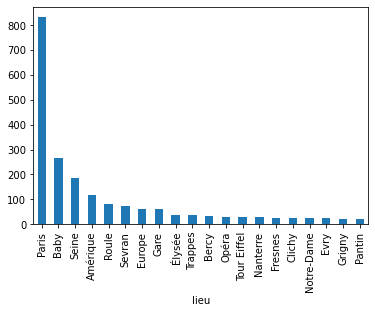

In [31]:
axes = df.plot.bar(x='lieu', y='compte', legend=False)

In [43]:
compte = [832,265,185,116,83,74,62,62,35,35,33,30,29,29,26,24,23,23,21,20]
for i in compte:
    per =(i*100)/489251
    print(i, per)
    
        
    

832 0.1700558608975761
265 0.05416442684838661
185 0.03781290176208122
116 0.02370971137514282
83 0.016964707277041847
74 0.01512516070483249
62 0.01267243194188668
62 0.01267243194188668
35 0.0071537922252586095
35 0.0071537922252586095
33 0.006745004098100975
30 0.006131821907364523
29 0.005927427843785705
29 0.005927427843785705
26 0.005314245653049253
24 0.004905457525891618
23 0.004701063462312801
23 0.004701063462312801
21 0.004292275335155166
20 0.004087881271576348


In [2]:
import spacy
nlp = spacy.load("fr_core_news_sm")

In [3]:
test = "Je suis étudiant à l'université Sorbonne."

In [4]:
from spacy import displacy

doc = nlp(test)
displacy.render(doc, style="ent", jupyter=True)

In [5]:
doc = nlp(test)
displacy.serve(doc, style="dep")

/Users/mustapha/opt/anaconda3/lib/python3.8/site-packages/spacy/displacy/__init__.py:97: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



127.0.0.1 - - [18/Jun/2021 03:42:29] "GET / HTTP/1.1" 200 5893
127.0.0.1 - - [18/Jun/2021 03:42:29] "GET /favicon.ico HTTP/1.1" 200 5893
127.0.0.1 - - [18/Jun/2021 03:43:38] "GET / HTTP/1.1" 200 5893
127.0.0.1 - - [18/Jun/2021 03:43:38] "GET /favicon.ico HTTP/1.1" 200 5893


Shutting down server on port 5000.


In [17]:
lieux = ouvrir_json("/Users/mustapha/Documents/GitHub/Memoire/infos&stats/infos_all_data.json")
list_lieux = []
for i in lieux:
    for k in i:
        if i == "baby" or i == "Baby"
        list_lieux.append(k["lieux"])
    #sum(list_lieux,[])

In [20]:
union=sum(list_lieux,[])

In [34]:
lieu2paris= []
for e in union:
    if e.lower() in list_lieux_IDF or e in list_lieux_IDF:
        lieu2paris.append(e)
  


In [35]:
print(len(lieu2paris))

2778


In [37]:
print(len(set(lieu2paris)))

248


In [36]:
print(lieu2paris)

['Amérique', 'Paris', 'Belleville', 'Paris', 'Villette', 'Montmartre', 'Clichy', 'Amérique', 'Paris', 'Porte de Champerret', 'Paris', 'rue de Rivoli', 'place Vendôme', 'Paris', "Goutte d'Or", 'Paris', 'Paris', 'rue Saint-Denis', 'Bourdonne', 'Paris', 'Paris', 'Paris', 'Paris', 'Clichy', 'Europe', 'place Blanche', 'place Dauphine', 'Paris', 'Paris', 'Notre-Dame', 'Clichy', 'Europe', 'Amérique', 'Paris', 'Paris', 'Amérique', 'Paris', 'Paris', 'Paris', 'Seine', 'Paris', 'Paris', 'Paris', 'Paris', 'Gare', 'Gare', 'Halles', 'Amérique', 'Paris', 'Amérique', 'Paris', 'Paris', 'Paris', 'Seine', 'Paris', 'Cité', 'Pologne', 'Amérique', 'Paris', 'rue Caroline', 'Seine', 'Paris', 'Opéra', 'Clichy', 'Tour Eiffel', 'Porte de Clignancourt', 'Clignancourt', 'Luxembourg', 'Paris', 'Paris', 'Paris', 'Opéra', 'Clichy', 'Melun', 'Paris', 'Seine', 'Paris', 'Clignancourt', 'Melun', 'Opéra', 'Élysée', 'Melun', 'Paris', 'Malakoff', 'Amérique', 'Gare', 'Seine', 'Melun', 'Melun', 'Paris', 'Paris', 'Paris', 'Sar